<a href="https://colab.research.google.com/github/agprad/signaling_metabolic_genereg/blob/main/Norm_hill_signalling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
import itertools

In [ ]:
x0 = [1,0,0,0,0]

In [ ]:
k = 1.37696
b = 2.56491
n = 1.4
def f_act (X):
    return (b*(X**n))/((k**n)+(X**n))

def f_inhib(X):
    return 1-f_act(X)



In [ ]:
def toy_main(x,t):
    A = x[0]
    B = x[1]
    C = x[2]
    D = x[3]
    E = x[4]
    dx = np.zeros(5)
    dx[0] = 0
    dx[1] = 0
    dx[2] = f_act(A) + f_act(E) - f_act(A)*f_act(E) - C
    dx[3] = f_act(B) - D
    dx[4] = f_act(C)*f_inhib(D) - E
    return dx


In [ ]:
#solving odes
t0 = np.array(np.linspace(10,30,100))

x = np.array(odeint(toy_main,x0,t0))


A0 = x[:,0]
B0 = x[:,1]
C0 = x[:,2]
D0 = x[:,3]
E0 = x[:,4]


In [ ]:
x0 = [0,0,C0[-1],D0[-1],E0[-1]]

In [ ]:
t1 = np.array(np.linspace(30,50,100))
x = np.array(odeint(toy_main,x0,t1))


A1 = x[:,0]
B1 = x[:,1]
C1 = x[:,2]
D1 = x[:,3]
E1 = x[:,4]


In [ ]:
x0 = [0,1,C1[-1],D1[-1],E1[-1]]

In [ ]:
t2 = np.array(np.linspace(50,70,100))

x = np.array(odeint(toy_main,x0,t2))


A2 = x[:,0]
B2 = x[:,1]
C2 = x[:,2]
D2 = x[:,3]
E2 = x[:,4]


In [ ]:
x0 = [0,0,C2[-1],D2[-1],E2[-1]]

In [ ]:
t3 = np.array(np.linspace(70,90,100))

x = np.array(odeint(toy_main,x0,t3))


A3 = x[:,0]
B3 = x[:,1]
C3 = x[:,2]
D3 = x[:,3]
E3 = x[:,4]


In [ ]:
x0 = [1,1,C3[-1],D3[-1],E3[-1]]

In [ ]:
t4 = np.array(np.linspace(90,110,100))

x = np.array(odeint(toy_main,x0,t4))


A4 = x[:,0]
B4 = x[:,1]
C4 = x[:,2]
D4 = x[:,3]
E4 = x[:,4]


In [ ]:
C = list(itertools.chain(C0,C1, C2 , C3 , C4))
D = list(itertools.chain(D0,D1, D2 , D3 , D4))
E = list(itertools.chain(E0,E1, E2 , E3 , E4))
t = list(itertools.chain(t0,t1, t2 , t3 , t4))

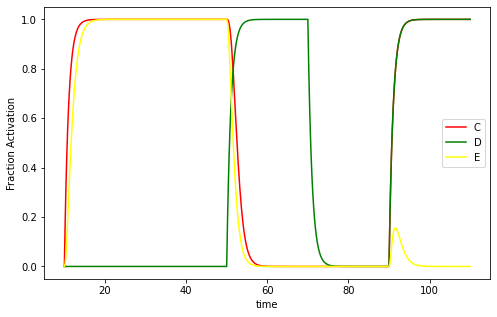

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(t,C,color="red",label="C")
plt.plot(t,D,color="green",label="D")
plt.plot(t,E,color="Yellow",label="E")
plt.legend(loc="best")
plt.xlabel("time")
plt.ylabel("Fraction Activation")
plt.show()